# __Porting STATUS__: Successful

First importing as always

In [1]:
from google.colab import drive
from os.path import join
import os

ROOT = '/content/drive'     # default for the drive
DATASET = 'My Drive/cs231n/Project/dataset/trainset'       # path to your dataset on Drive

# this mounts your Google Drive to the Colab VM.
drive.mount(ROOT)           # we mount the drive at /content/drive

DATASET_PATH = join(ROOT, DATASET)

os.chdir(DATASET_PATH)                        # Change directory to the location defined in dataset_path (Note cd doesn't always work)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from evaluate.lane import LaneEval
%matplotlib inline

Suppose we have two json files, one is the ground truth and the other is the prediction.

We assume that each line in prediction json file is corresponding to the ground truth json, 
which means both lines are related to the same image.

In [0]:
json_pred = [json.loads(line) for line in open('label_0313.json').readlines()]
json_gt = [json.loads(line) for line in open('label_0313.json')]

In [0]:
pred, gt = json_pred[1], json_gt[1]
pred_lanes = pred['lanes']
#run_time = pred['run_time']
gt_lanes = gt['lanes']
y_samples = gt['h_samples']
raw_file = gt['raw_file']

First let's check out the image.

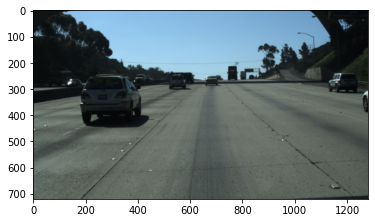

In [9]:
img = plt.imread(raw_file)
plt.imshow(img)
plt.show()

Then, we show how to use `y_samples`.

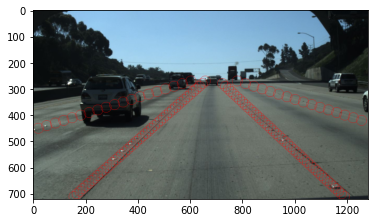

In [11]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    for pt in lane:
        cv2.circle(img_vis, pt, radius=20, color=(255, 0, 0))

plt.imshow(img_vis)
plt.show()

Then, we show the ground truth and the prediction example.

The ground truth is shown in green and the prediction is shown in blue. As we can see the prediction is not perfect.

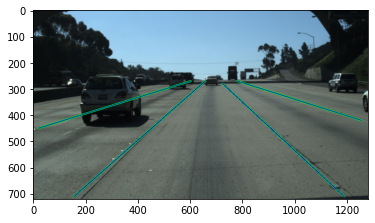

In [12]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
pred_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in pred_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,255,0), thickness=5)
for lane in pred_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,0,255), thickness=2)

plt.imshow(img_vis)
plt.show()

Now we can use the tool to evaluate the prediction based on the data.

The evaluation metric is described on the benchmark website.

In [0]:
#np.random.shuffle(pred_lanes)
# Overall Accuracy, False Positive Rate, False Negative Rate
#print LaneEval.bench(pred_lanes, gt_lanes, y_samples, run_time)

0.932291666667 0.25 0.25
